<a href="https://colab.research.google.com/github/Styler10/ML2025/blob/main/Practice4_VVSU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-depression-dataset' dataset.
Path to dataset files: /kaggle/input/student-depression-dataset


In [39]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [41]:
category_features = list(df.select_dtypes(include="object").columns)

In [42]:
for col in category_features:
    df[col] = df[col].astype("category")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

In [44]:
df.isnull().sum().sum()

np.int64(0)

In [45]:
print((df['Financial Stress'] == '?').sum())
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

df = df.dropna(subset=['Financial Stress'])

3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27898 non-null  int64   
 1   Gender                                 27898 non-null  category
 2   Age                                    27898 non-null  float64 
 3   City                                   27898 non-null  category
 4   Profession                             27898 non-null  category
 5   Academic Pressure                      27898 non-null  float64 
 6   Work Pressure                          27898 non-null  float64 
 7   CGPA                                   27898 non-null  float64 
 8   Study Satisfaction                     27898 non-null  float64 
 9   Job Satisfaction                       27898 non-null  float64 
 10  Sleep Duration                         27898 non-null  category

In [47]:
categorial_features  = list(df.select_dtypes(include=['category']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [48]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [49]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[caterigal_cols])

X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,City_'Less Delhi',City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [51]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
scaler = StandardScaler()
df[numeric_features[1:-1]] = scaler.fit_transform(df[numeric_features[1:-1]])

In [53]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,1.463201,1.345456,-0.009777,0.893354,-0.693539,-0.01534,1,-1.121115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,-0.371450,-0.826195,-0.009777,-1.194113,1.510565,-0.01534,0,-1.121115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,1.055501,-0.102311,-0.009777,-0.425762,1.510565,-0.01534,0,0.497212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,0.443950,-0.102311,-0.009777,-1.404899,-0.693539,-0.01534,1,-0.851394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,-0.167600,0.621573,-0.009777,0.322191,0.041162,-0.01534,1,-1.660558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,0.240100,1.345456,-0.009777,-1.296106,1.510565,-0.01534,1,-0.042230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,0.240100,-0.826195,-0.009777,1.185735,0.041162,-0.01534,0,-1.930279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,1.055501,-0.102311,-0.009777,-0.711343,0.775863,-0.01534,0,1.306376,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,-1.594552,1.345456,-0.009777,-0.527755,-0.693539,-0.01534,1,0.766933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KMeans

In [54]:
df_not_processed1 = df.copy()

In [55]:
inertias = []
silhouettes = []

In [56]:
K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, kmeans.labels_))

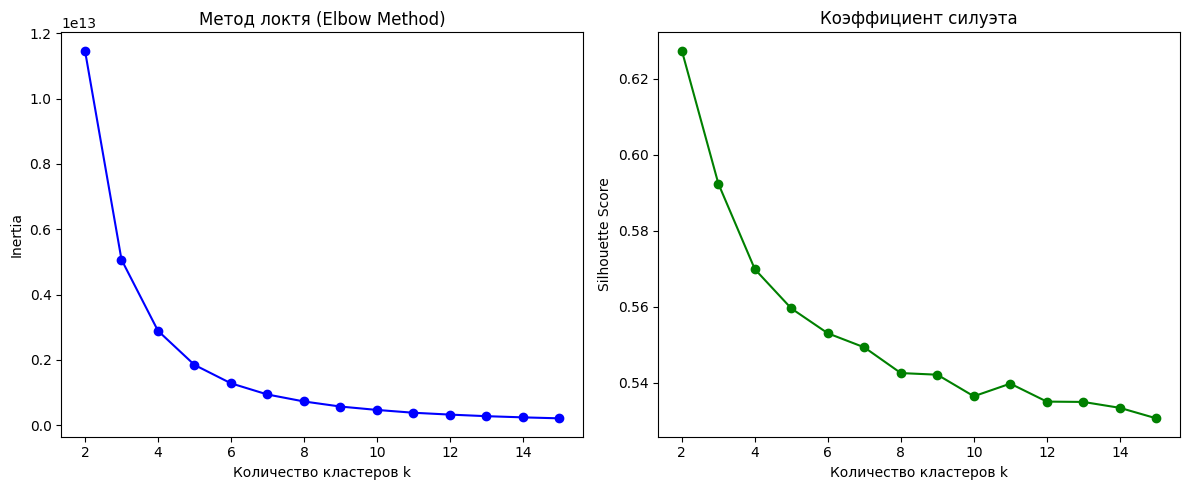

In [57]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

По графикам можем определить, что хорошее кол-во кластеров - 5.

In [58]:
kmeans_b = KMeans(n_clusters=5, random_state=42)
kmeans_b.fit(df)

KMeans(n_clusters=5, random_state=42)

In [59]:
df_not_processed1['cluster'] = kmeans_b.labels_

In [60]:
cluster_means_km = df_not_processed1.groupby('cluster').mean()
cluster_means_km

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
0,69851.859519,0.550955,-0.012224,-0.008175,-0.001734,0.011496,0.012304,-0.003385,0.636943,0.001196,...,0.021585,0.019285,0.026362,0.037686,0.021939,0.007608,0.007254,0.042640,0.001415,0.017339
1,126505.166280,0.555397,0.015919,0.019348,0.010500,-0.020119,0.001707,0.016809,0.638359,-0.005225,...,0.018733,0.019804,0.025513,0.037110,0.018555,0.006423,0.006244,0.041570,0.000892,0.020339
2,13888.036923,0.557657,-0.004906,0.000649,0.010894,0.026038,-0.009083,0.013338,0.634231,0.011783,...,0.022554,0.020189,0.025282,0.035286,0.019825,0.006912,0.006730,0.041106,0.001819,0.018916
3,98506.559526,0.554927,-0.007347,0.002564,-0.009777,-0.005880,0.017898,-0.011356,0.631169,-0.003487,...,0.016451,0.019989,0.025650,0.038033,0.022112,0.006015,0.006722,0.046170,0.000884,0.018044
4,41555.435155,0.567577,0.008810,-0.014627,-0.009777,-0.011316,-0.023743,-0.015340,0.623497,-0.004106,...,0.018215,0.021494,0.021676,0.038980,0.020036,0.006193,0.007286,0.041712,0.001275,0.018944


Выведем возраст пол и депрессию для того чтобы было удобнее

In [73]:
cluster_means_km[["Age", "Gender", "Depression"]]

,Age,Gender,Depression
cluster,,,
0,-0.012224,0.550955,0.583333
1,0.015919,0.555397,0.589652
2,-0.004906,0.557657,0.587304
3,-0.007347,0.554927,0.582523
4,0.008810,0.567577,0.584882


In [75]:
inr_km = kmeans_b.inertia_#сумма растояний от каждой точки до центра кластера
sil_km = silhouette_score(df, kmeans_b.labels_)# чем больше тем лучше
db_index_km = davies_bouldin_score(df, kmeans_b.labels_)#чем меньше тем лучше
ch_index_km = calinski_harabasz_score(df, kmeans_b.labels_)#чем больше тем лучше

print(f"Kmeans inertia - {round(inr_km / 1e13, 3)}\nSilhoutte score - {round(sil_km, 3)}\nDBI - {round(db_index_km, 3)}\nCHI - {round(ch_index_km, 3)}")

Kmeans inertia - 0.184
Silhoutte score - 0.56
DBI - 0.503
CHI - 167411.775


## DBSCAN

In [63]:
df_not_processed2 = df.copy()

In [64]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

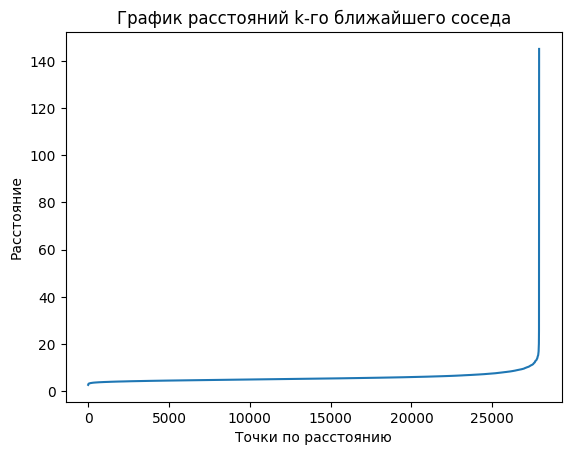

In [65]:
distances = np.sort(distances[:, 1])
plt.plot(distances)
plt.title('График расстояний k-го ближайшего соседа')
plt.ylabel('Расстояние')
plt.xlabel('Точки по расстоянию')
plt.show()

По методу ближайших соседей мы рассчитываем EPS

eps (эпсилон) — это параметр алгоритма DBSCAN, обозначающий максимальное расстояние между точками, чтобы они считались соседями в рамках одной кластеризации

In [66]:
dbscan = DBSCAN(eps=20, min_samples=10)
clusters_dbs = dbscan.fit_predict(df)

df_not_processed2['cluster'] = clusters_dbs
mask = clusters_dbs != -1

sil_dbs = silhouette_score(df_not_processed2[mask], clusters_dbs[mask])
db_index_dbs = davies_bouldin_score(df_not_processed2[mask], clusters_dbs[mask])
ch_index_dbs = calinski_harabasz_score(df_not_processed2[mask], clusters_dbs[mask])

print(f"Silhoutte score - {round(sil_dbs, 3)}\nDBI - {round(db_index_dbs, 3)}\nCHI - {round(ch_index_dbs, 3)}")

Silhoutte score - 0.682
DBI - 0.356
CHI - 48897899.989


In [67]:
cluster_mean_dbs = df_not_processed2.groupby('cluster').mean()
cluster_mean_dbs

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
cluster,,,,,,,,,,,,,,,,,,,,,
-1,69793.850910,0.567081,0.000989,0.013212,0.016493,-0.005411,-0.001223,0.025878,0.632861,-0.009837,...,0.018684,0.023307,0.023500,0.036502,0.020900,0.006164,0.00809,0.043918,0.001445,0.021381
0,329.100000,0.450000,-0.402028,-0.102311,-0.009777,-0.065385,-0.326189,-0.015340,0.650000,-0.015258,...,0.000000,0.000000,0.100000,0.050000,0.000000,0.000000,0.00000,0.050000,0.000000,0.000000
1,516.045455,0.545455,0.026984,-0.201022,-0.009777,0.142002,-0.226002,-0.015340,0.500000,0.141670,...,0.000000,0.000000,0.045455,0.045455,0.000000,0.045455,0.00000,0.045455,0.000000,0.000000
2,603.500000,0.642857,0.036250,0.052807,-0.009777,-0.021673,-0.168753,-0.015340,0.857143,0.497212,...,0.000000,0.071429,0.000000,0.142857,0.071429,0.000000,0.00000,0.071429,0.000000,0.000000
3,755.793651,0.523810,0.026543,-0.021880,-0.009777,-0.141151,0.041162,-0.015340,0.634921,0.103333,...,0.031746,0.000000,0.031746,0.031746,0.047619,0.000000,0.00000,0.031746,0.000000,0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,139994.062500,0.500000,0.354766,-0.057068,-0.009777,-0.566003,0.408513,-0.015340,0.687500,0.497212,...,0.000000,0.062500,0.062500,0.062500,0.000000,0.000000,0.00000,0.000000,0.000000,0.062500
1035,140046.222222,0.555556,0.262750,-0.424037,-0.009777,-0.841291,-0.040471,-0.015340,0.666667,0.287429,...,0.111111,0.000000,0.111111,0.111111,0.000000,0.000000,0.00000,0.111111,0.000000,0.000000
1036,140162.400000,0.400000,-0.018110,-0.247088,-0.009777,-0.326035,-0.056798,-0.015340,0.666667,-0.042230,...,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.00000,0.066667,0.000000,0.000000


<Axes: xlabel='cluster', ylabel='Depression'>

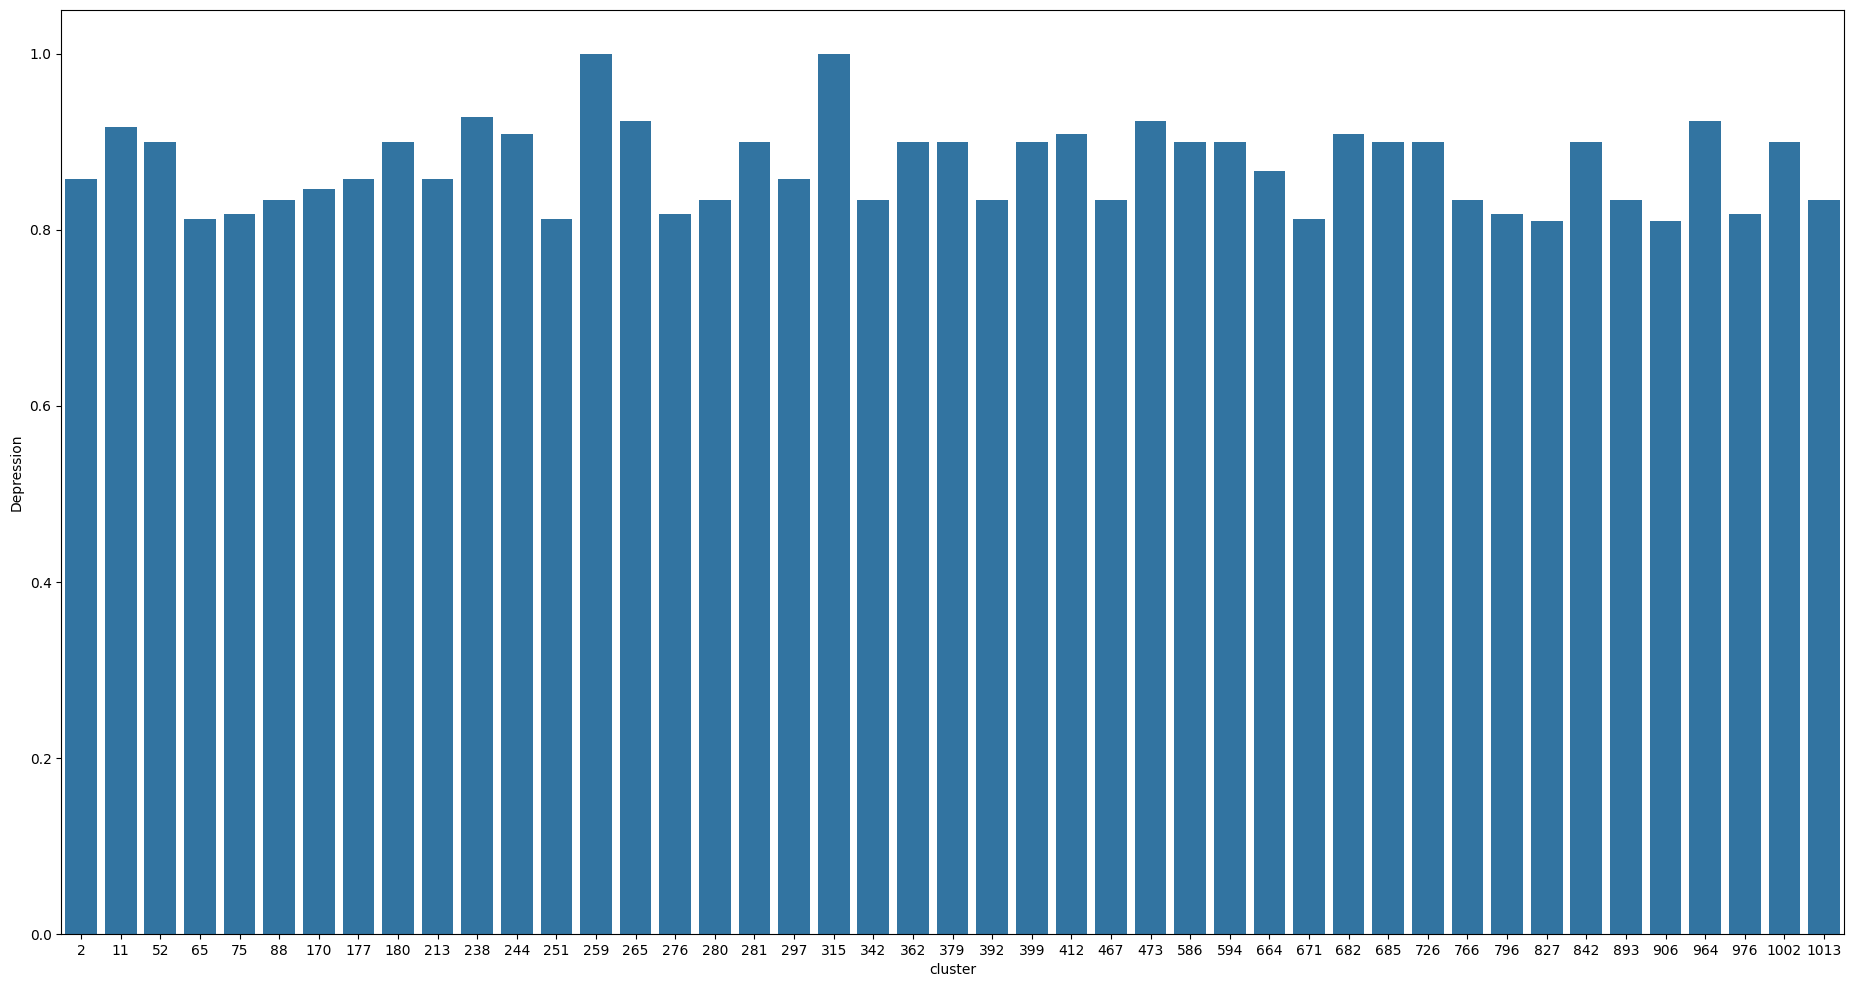

In [68]:
high_dep_clusters = cluster_mean_dbs[cluster_mean_dbs['Depression'] > 0.8]

plt.figure(figsize=(23, 12))
sns.barplot(
    x=high_dep_clusters.index,
    y=high_dep_clusters['Depression'],
)

Распределение кластеров где депрессия больше 0.8

/tmp/ipython-input-3669751773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_mean_dbs.index, y=cluster_mean_dbs['Academic Pressure'], palette='coolwarm')


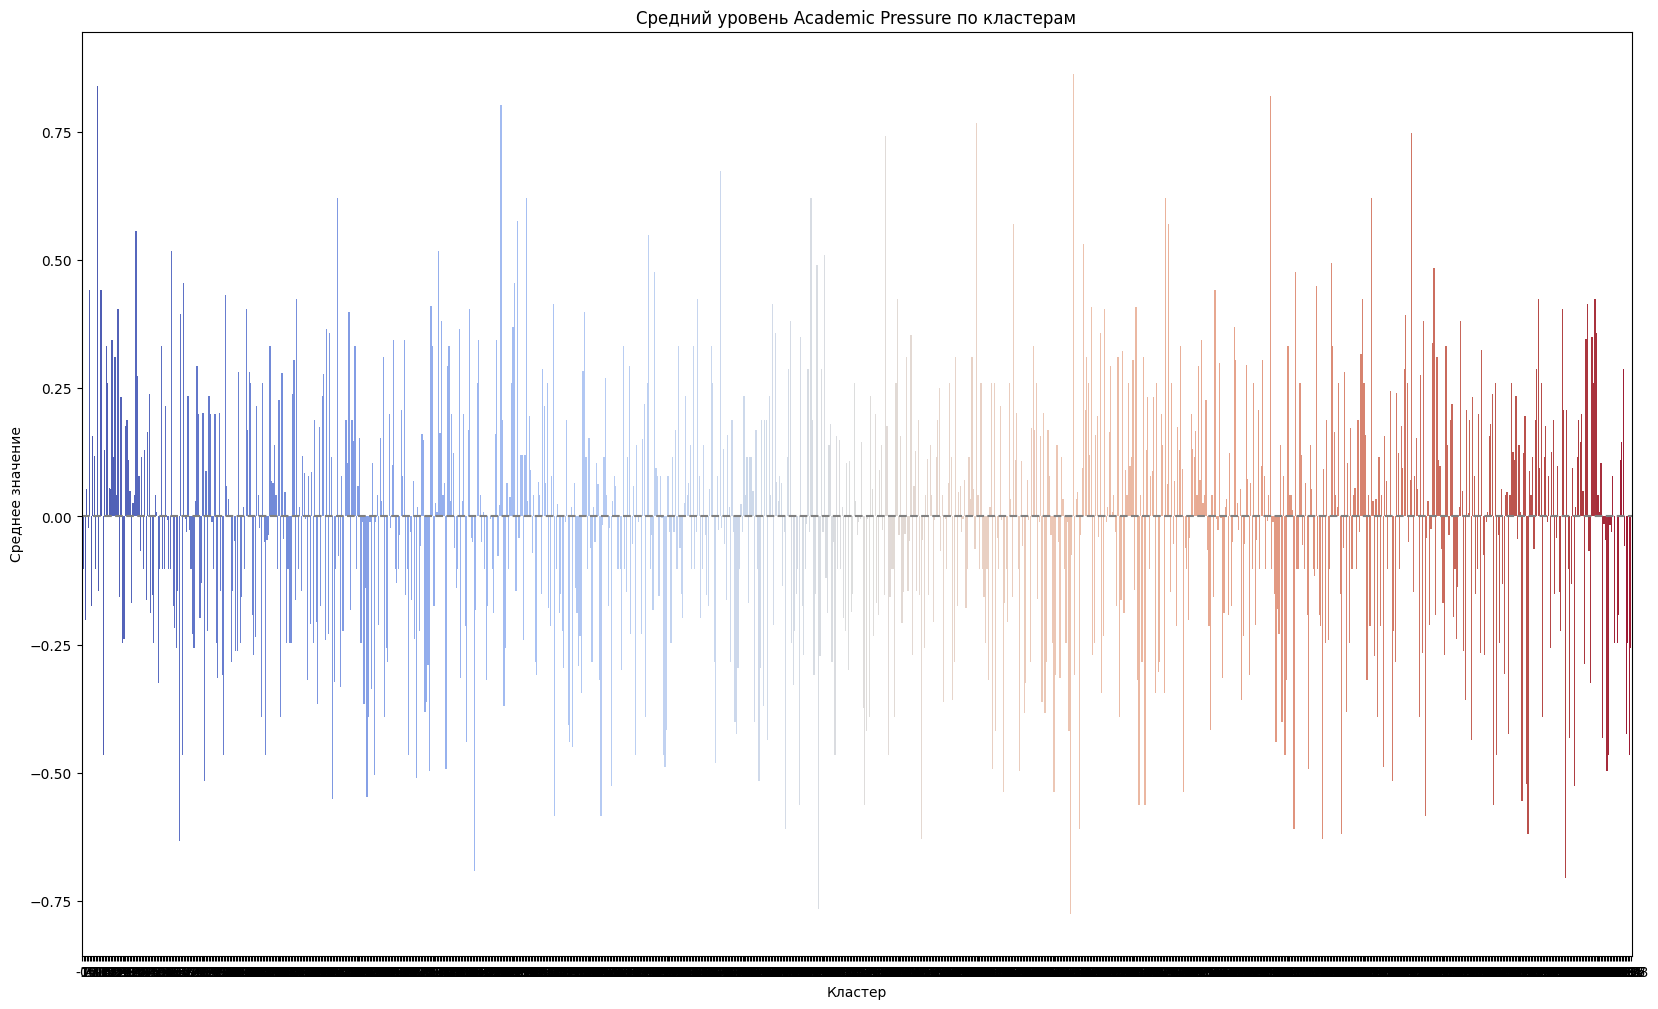

In [69]:
plt.figure(figsize=(20, 12))
sns.barplot(x=cluster_mean_dbs.index, y=cluster_mean_dbs['Academic Pressure'], palette='coolwarm')
plt.title(f"Средний уровень Academic Pressure по кластерам")
plt.xlabel("Кластер")
plt.ylabel("Среднее значение")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

/tmp/ipython-input-1270065176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_mean_dbs.index, y=cluster_mean_dbs["Study Satisfaction"], palette='crest')


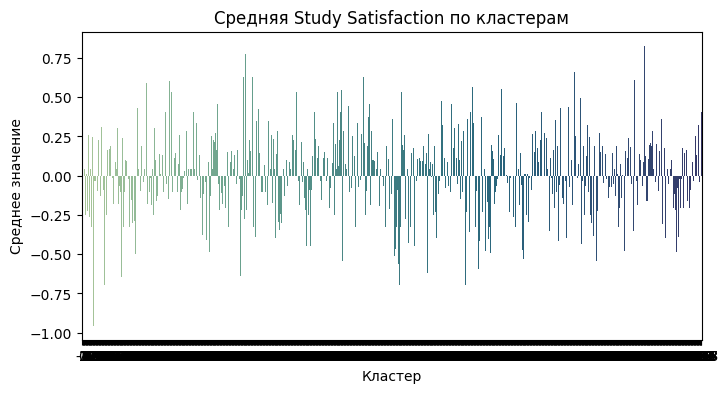

In [70]:
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_mean_dbs.index, y=cluster_mean_dbs["Study Satisfaction"], palette='crest')
plt.title(f"Средняя Study Satisfaction по кластерам")
plt.xlabel("Кластер")
plt.ylabel("Среднее значение")
plt.show()

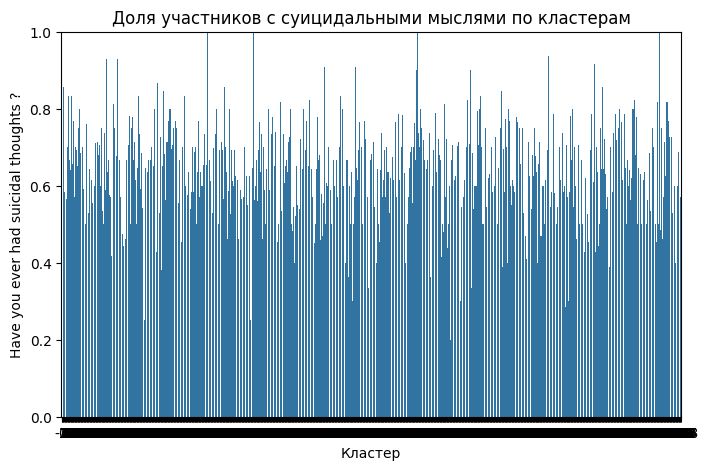

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_mean_dbs.index, y=cluster_mean_dbs['Have you ever had suicidal thoughts ?'])
plt.title("Доля участников с суицидальными мыслями по кластерам")
plt.xlabel("Кластер")
plt.ylim(0, 1)
plt.show()

У DBSCAN лучшие метрики. Также, он лучше нам подошел, так как мы не знали заранее количество кластеров.